In [1]:
import math
import unittest
import json

from osgeo import gdal

import helper
import numpy as np
import street_mapping as sm
# import rasterio

import matplotlib.pyplot as plt

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

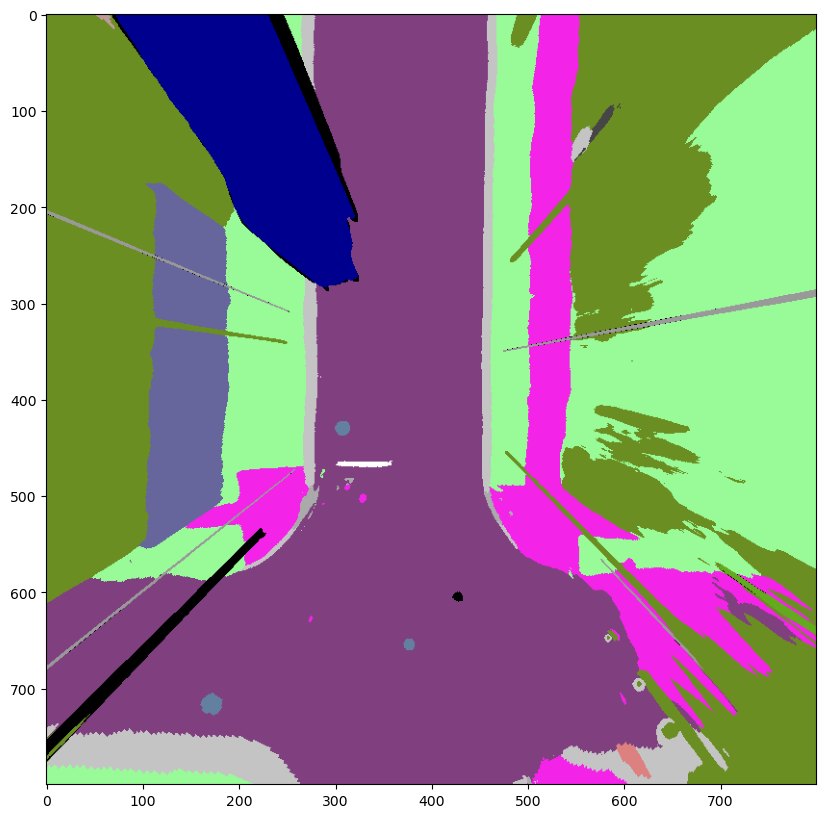

In [73]:
# set the image path
seg_file = r'./test_images/landcover/-rJ3uIiYgKJ1rvZqs3L02A_DOM_0.05.tif'

# create a new Image_landcover instance
img_landcover = sm.Image_landcover(landcover_path=seg_file)

# show the image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_landcover.landcover_pil)

In [74]:
# Set the bearing angle
# Define some helper functions. For the test image (-rJ3uIiYgKJ1rvZqs3L02A_DOM_0.05.tif), this angle is 358
pano_bearing_deg = 358

img_landcover.scan_width(pano_bearing_deg=pano_bearing_deg, target_ids=[5, 7, 9, 10, 11, 16, 24, 30, 35, 40, 45], interval_pix=10)

# The measurements will be invalid when touching the moving objects such as vehicle and people.
img_landcover.set_invalid_touch(touch_ids=[25, 28, 29, 31, 32, 33, 34, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 255])

# The measurements will be valid when both ends touching the fixed objects such as curb and fence.
img_landcover.set_valid_touch(touch_ids=[0, 1, 2, 3, 4, 6, 8, 12, 14, 21, 22, 23, 36, 37, 38, 39, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53])

# compute the measurement validity
img_landcover.scanlines_touch_validity(tolerance_pix=6)

In [94]:
img_landcover.scaned_lines_df
# pts[['end_x', 'end_y']]

,start_x,start_y,end_x,end_y,cover_ratio,length,file_name,touch_invalid,touch_valid
0,391966.224,141915.475,391967.623,141915.524,0.464,1.40,-rJ3uIiYgKJ1rvZqs3L02A_DOM_0.05,1,1
1,391966.191,141914.974,391975.136,141915.286,0.530,8.95,-rJ3uIiYgKJ1rvZqs3L02A_DOM_0.05,1,1
2,391966.159,141914.472,391975.153,141914.787,0.583,9.00,-rJ3uIiYgKJ1rvZqs3L02A_DOM_0.05,0,1
3,391966.126,141913.971,391975.171,141914.287,0.627,9.05,-rJ3uIiYgKJ1rvZqs3L02A_DOM_0.05,0,1
4,391966.144,141913.471,391975.188,141913.787,0.676,9.05,-rJ3uIiYgKJ1rvZqs3L02A_DOM_0.05,0,1
...,...,...,...,...,...,...,...,...,...
80,391964.319,141876.885,391984.007,141877.573,0.525,19.70,-rJ3uIiYgKJ1rvZqs3L02A_DOM_0.05,0,1
81,391964.737,141876.400,391978.728,141876.888,0.578,14.00,-rJ3uIiYgKJ1rvZqs3L02A_DOM_0.05,0,1
82,391982.026,141877.003,391983.325,141877.049,0.670,1.30,-rJ3uIiYgKJ1rvZqs3L02A_DOM_0.05,0,1
83,391965.154,141875.914,391977.896,141876.359,0.555,12.75,-rJ3uIiYgKJ1rvZqs3L02A_DOM_0.05,0,1


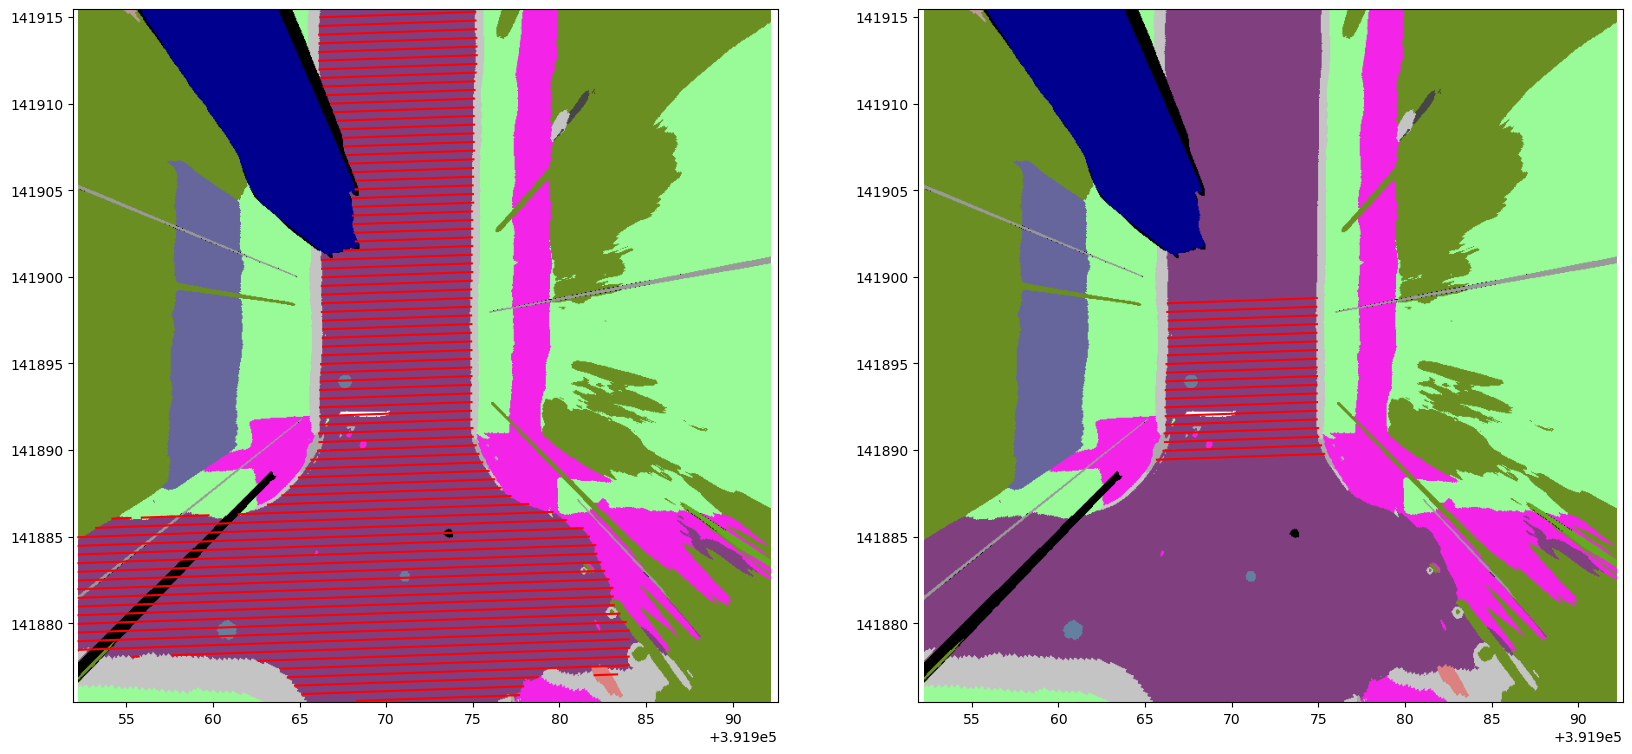

In [104]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))
ax1.axis('equal')
ax2.axis('equal')

# img_landcover = sm.Image_landcover(landcover_path=seg_file)


img_landcover.draw_img(ax=ax1)
img_landcover.draw_img(ax=ax2)

lines = img_landcover.scaned_lines_df.drop(columns="file_name")
lines = np.array(lines)
for line in lines:
    # print(line)
    x1, y1, x2, y2, cover_ratio, length, touch_invalid,	touch_valid = line
    ax1.plot((x1, x2), (y1, y2), color='red')

    if cover_ratio > 0.95 and length > 3 and touch_invalid == 0:
        ax2.plot((x1, x2), (y1, y2), color='red')
# img = plt.imread(seg_file)
# imgplot =  ax1.imshow(img)
# img_h, img_w = img.shape[:2]

# test land cover functions

Road surface classes:[5, 7, 9, 10, 11, 16, 24, 30, 35, 40, 45]
5	construction--flat--bike-lane
7	construction--flat--parking
9	construction--flat--rail-track
10	construction--flat--road
11	construction--flat--service-lane
16	marking--general
24	object--pothole
30	construction--flat--crosswalk-plain
35	marking--crosswalk-zebra
40	object--catch-basin
45	object--manhole


Road edges: [0, 1, 2, 3, 4, 6, 8, 12, 14, 21, 22, 23, 36, 37, 38, 39, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53]
0	construction--barrier--curb
1	construction--barrier--fence
2	construction--barrier--guard-rail
3	construction--barrier--other-barrier
4	construction--barrier--wall
6	construction--flat--curb-cut
8	construction--flat--pedestrian-area
12	construction--flat--sidewalk
14	construction--structure--building
21	nature--terrain
22	nature--vegetation
23	nature--water
36	object--banner
37	object--bench
38	object--bike-rack
39	object--billboard
41	object--cctv-camera
42	object--fire-hydrant
43	object--junction-box
44	object--mailbox
46	object--phone-booth
47	object--street-light
48	object--support--pole
49	object--support--traffic-sign-frame
50	object--support--utility-pole
51	object--traffic-light
52	object--traffic-sign--back
53	object--traffic-sign--front


Occluded: [25, 28, 29, 31, 32, 33, 34, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 255]
25	object--vehicle--on-rails
28	animal--bird
29	animal--ground-animal
31	human--person
32	human--rider--bicyclist
33	human--rider--motorcyclist
34	human--rider--other-rider
54	object--trash-can
55	object--vehicle--bicycle
56	object--vehicle--boat
57	object--vehicle--bus
58	object--vehicle--car
59	object--vehicle--caravan
60	object--vehicle--motorcycle
61	object--vehicle--other-vehicle
62	object--vehicle--trailer
63	object--vehicle--truck
64	object--vehicle--wheeled-slow
255 other

In [28]:
seg_file = r'./test_images/S_ZmoNLdzo0FApj_jGiFJg_DOM_0.05.tif'

img_landcover = sm.Image_landcover(landcover_path=seg_file)

# img_smoothed = helper.img_smooth(img_cv=img_landcover.landcover_np)

# plt.imshow(img_landcover.landcover_pil)
# img_landcover.scan_width(pano_bearing_deg=196.219, target_ids=[10])  #[8, 12] is sidewalk, [10]: road
img_landcover.scan_width(pano_bearing_deg=225, target_ids=[10, 16, 24, 30, 35])  #[8, 12] is sidewalk, [10]: road
# plt.imshow(img_landcover.target_img_np)
# img_landcover.img_rotated.max()

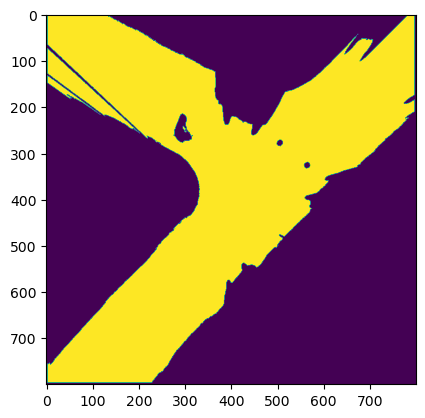

In [29]:
plt.imshow(img_landcover.target_img_np)

In [22]:
import numpy as np
plt.imshow(img_landcover.img_rotated)
plt.colorbar()

AttributeError: 'Image_landcover' object has no attribute 'img_rotated'

In [23]:
img_landcover.target_img_np.mean()

0.4155484375

In [131]:
import geopandas as gpd
road_gdf = gpd.read_file(r'E:\Research\street_image_mapping\DC_roads2.shp')
road_gdf

KeyboardInterrupt: 

In [6]:
import glob
from tqdm import tqdm
import pandas as pd
import os
import utils
def merge_csv(file_dir=r'D:\Research\street_image_mapping\DC_roads'):
    files = glob.glob(os.path.join(file_dir, '*.csv'))
    all_df_list = []
    for f in tqdm(files[:]):
        # print(f)
        df = pd.read_csv(f)
        all_df_list.append(df)

    all_df = pd.concat(all_df_list)
    all_df.to_csv(r'D:\Research\street_image_mapping\DC_roads.csv', index=False)
    return  all_df


all_df = merge_csv()

100%|██████████| 157367/157367 [17:15<00:00, 151.94it/s]


In [7]:
len(all_df)

35273586

In [8]:
all_df.columns

Index(['start_x', 'start_y', 'end_x', 'end_y', 'cover_ratio', 'touch_invalid',
       'touch_valid', 'length', 'file_name'],
      dtype='object')

In [9]:
t_df = all_df.query(" length > 3 and touch_invalid ==0 and cover_ratio > 0.9 ")

In [10]:
len(t_df)

8012799

In [15]:
t_df.to_csv(r'D:\Research\street_image_mapping\DC_roads_valid.csv', index=False)

In [18]:
helper.measurements_to_shapefile(widths_files=['D:\Research\street_image_mapping\DC_roads_valid.csv'],saved_path=r'D:\Research\street_image_mapping')

E:\Research\street_image_mapping\Python_code\helper.py:445: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(new_name)


2023-01-25 11:55:52,639 - fiona._env - WARNING - __init__ - 165 - Normalized/laundered field name: 'cover_ratio' to 'cover_rati'
2023-01-25 11:55:52,641 - fiona._env - WARNING - __init__ - 165 - Normalized/laundered field name: 'touch_invalid' to 'touch_inva'
2023-01-25 11:55:52,641 - fiona._env - WARNING - __init__ - 165 - Normalized/laundered field name: 'touch_valid' to 'touch_vali'


In [13]:
all_df['touch_invalid'].value_counts()

1    21908276
0    13365310
Name: touch_invalid, dtype: int64

In [14]:
all_df['touch_valid'].value_counts()

0    18125580
1    17148006
Name: touch_valid, dtype: int64

# GDAL test

In [3]:
import os
from osgeo import gdal, ogr, osr
from tqdm import tqdm

shapefile = "D:\Research\street_image_mapping\panoramas_CRS6487_20m_envelope.shp"
image = "D:\Research\street_image_mapping\DC_roads2.img"

# Open the shapefile
shape_ds = ogr.Open(shapefile)
shape_lyr = shape_ds.GetLayer()

# Open the image
img_ds = gdal.Open(image)

# Get the projection and transform information of the image
proj = img_ds.GetProjection()
transform = img_ds.GetGeoTransform()

In [4]:
img_ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x00000252B1732940> >

In [6]:
# Loop through each feature in the shapefile
save_dir = r'D:\Research\street_image_mapping\Road_ground_truth_split'
for feature in tqdm(shape_lyr):
    # Get the panoId attribute of the feature
    try:
        panoId = feature.GetField("panoId")

        # Get the geometry of the feature
        geom = feature.GetGeometryRef()

        # Get the coordinates of the bounding box of the geometry
        x_min, x_max, y_min, y_max = geom.GetEnvelope()
        # print(f"{panoId}: x_min, x_max, y_min, y_max:", x_min, x_max, y_min, y_max)

        # Get the sub-image using the coordinates of the bounding box
        out_file = os.path.join(save_dir, f'{panoId}.tif')
        OutTile = gdal.Warp(out_file, img_ds,
                            format='GTiff', outputBounds=[x_min, y_min, x_max, y_max],
                            dstSRS=proj, dstNodata = 0)
        # Create a TFW file
        tfw_file = os.path.join(save_dir, f'{panoId}.tfw')
        with open(tfw_file, 'w') as f:
            f.write("%.3f\n%.3f\n%.3f\n%.3f\n%.3f\n%.3f\n" % (transform[1], transform[2], transform[4], transform[5], x_min, y_max))
    except Exception as e:
        print("Error:", e, panoId)
    # out_ds = None
    # break
OutTile


100%|██████████| 160583/160583 [1:00:14<00:00, 44.43it/s]


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x00000252F9A2FF90> >

In [34]:
len(OutTile)

TypeError: object of type 'NoneType' has no len()

In [25]:
import glob
seg_dir = r'D:\Research\street_image_mapping\Road_ground_truth_split'

DOM_files = glob.glob(os.path.join(seg_dir, "*.tif"))

len(DOM_files), DOM_files[-1]

(160583,
 'D:\\Research\\street_image_mapping\\Road_ground_truth_split\\__zUXvAsCfoodsgxWHyTlQ.tif')

In [23]:
# [os.remove(f) for f in tqdm(DOM_files)]
for f in tqdm(DOM_files):
    try:
        # os.remove(f)
        pass
    except:
        print(f)
        continue


100%|██████████| 4/4 [00:00<00:00, 1998.48it/s]
